In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import os
import time

from zipfile import ZipFile
import collections
import random
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
data=pd.Series(pd.read_pickle('/content/drive/MyDrive/Data/set_0.pkl'))
data_new=data.str.split(pat="\t",expand=True)

In [ ]:
data[7176:]

7176     2258277193_586949ec62.jpg.1#3\tThree person st...
7177     2786245676_0a69543832.jpg#1\tA small boy wear ...
7178     772212710_f5fc22ed35.jpg#2\tTwo little girl be...
7179     1187435567_18173c148b.jpg#3\tA small , shaggy ...
7180     3258874419_23fec1bdc1.jpg#1\tA greyhound dog w...
                               ...                        
24995    2993388841_6746140656.jpg#3\tA basketball play...
24996    3578372039_57473f473c.jpg#1\tA young man ride ...
24997    3186073578_6e115f45f5.jpg#0\tA man display a p...
24998    2653552905_4301449235.jpg#3\tTwo man stand in ...
24999    3719461451_07de35af3a.jpg#0\tA pelican fly ove...
Length: 17824, dtype: object

In [ ]:
def image_sep(image_df):
  image_df['Images']=image_df[0].apply(lambda x : x.split('#')[0])
  image_df['Caption_ID']=image_df[0].apply(lambda x : x.split('#')[1])
  image_df=image_df.rename({1:'Captions'},axis=1)
  image_df.drop(labels=[0],axis=1,inplace=True)

  return image_df

In [ ]:
final_data=image_sep(data_new)
final_data

,Captions,Images,Caption_ID
0,A man in a black hoodie be hold a paper sign .,318667317_108c402140.jpg,4
1,Three race dog be run out of the start gate on...,2072574835_febf0c5fb9.jpg,4
2,Two motorcycle with two rider each .,3083016677_5782bc337c.jpg,4
3,A man on a bike nest to a river .,95734038_2ab5783da7.jpg,0
4,A football player try tackle another player wh...,241346146_f27759296d.jpg,1
...,...,...,...
24995,A basketball player in a blue uniform be guard...,2993388841_6746140656.jpg,3
24996,A young man ride a skateboard and carry large ...,3578372039_57473f473c.jpg,1
24997,A man display a photograph .,3186073578_6e115f45f5.jpg,0
24998,Two man stand in front of a condominium buildi...,2653552905_4301449235.jpg,3


In [ ]:
#Quality Issue in Image name
final_data[final_data['Images']=='2258277193_586949ec62.jpg.1']

,Captions,Images,Caption_ID
7176,Three person stand at a station .,2258277193_586949ec62.jpg.1,3
17598,Some person look out window in a large building .,2258277193_586949ec62.jpg.1,1
21895,two woman and one man stand near train track .,2258277193_586949ec62.jpg.1,4
23373,person wait for a subway,2258277193_586949ec62.jpg.1,0


In [ ]:
#Removing digits at the end of Image names
def image_Quality(image_df):
  image_df['Images']=image_df['Images'].apply(lambda x : x.rstrip(f'.{string.digits}'))
  

  return image_df

In [ ]:
final_data=image_Quality(final_data)
final_data

,Captions,Images,Caption_ID
0,A man in a black hoodie be hold a paper sign .,318667317_108c402140.jpg,4
1,Three race dog be run out of the start gate on...,2072574835_febf0c5fb9.jpg,4
2,Two motorcycle with two rider each .,3083016677_5782bc337c.jpg,4
3,A man on a bike nest to a river .,95734038_2ab5783da7.jpg,0
4,A football player try tackle another player wh...,241346146_f27759296d.jpg,1
...,...,...,...
24995,A basketball player in a blue uniform be guard...,2993388841_6746140656.jpg,3
24996,A young man ride a skateboard and carry large ...,3578372039_57473f473c.jpg,1
24997,A man display a photograph .,3186073578_6e115f45f5.jpg,0
24998,Two man stand in front of a condominium buildi...,2653552905_4301449235.jpg,3


In [ ]:
final_data['Images'].nunique()

8037

In [ ]:
final_data[final_data['Images']=='2258277193_586949ec62.jpg']

,Captions,Images,Caption_ID
7176,Three person stand at a station .,2258277193_586949ec62.jpg,3
17598,Some person look out window in a large building .,2258277193_586949ec62.jpg,1
21895,two woman and one man stand near train track .,2258277193_586949ec62.jpg,4
23373,person wait for a subway,2258277193_586949ec62.jpg,0


In [ ]:
final_data[final_data['Images']=='2258277193_586949ec62.jpg.1']

,Captions,Images,Caption_ID


In [ ]:
#image_zip = ZipFile('/content/drive/MyDrive/Data/Image_captioning_Dataset.zip', 'r')
#image_zip.extractall('/content/drive/MyDrive/Data/Image_captioning_Dataset/')
#image_zip.close()

In [ ]:
#Group all captions together
PATH='/content/drive/MyDrive/Data/Image_captioning_Dataset/Flicker8k_Dataset/'
image_path_to_caption = collections.defaultdict(list)
for i in range(final_data.shape[0]):
  if os.path.exists(PATH +f"{final_data['Images'][i]}"):
    caption=f"<start> {final_data['Captions'][i]} <end>"
    image_path=PATH +f"{final_data['Images'][i]}"
    image_path_to_caption[image_path].append(caption)

In [ ]:
image_paths = list(image_path_to_caption.keys())
random.shuffle(image_paths)

#selecting 6500 image paths
train_image_paths = image_paths[:6000]
print(len(train_image_paths))

6000


In [ ]:
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
  caption_list = image_path_to_caption[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))

<start> Five man dress in white ride on elephant that be paint with bright color . <end>


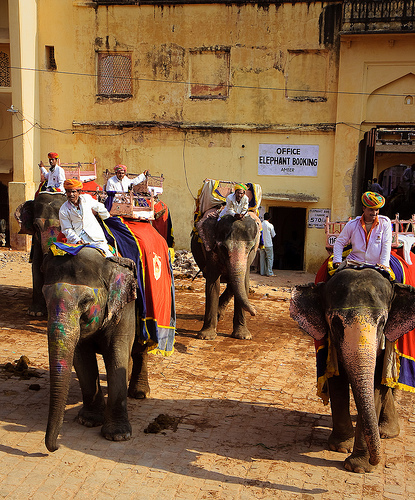

In [ ]:
print(train_captions[0])
Image.open(img_name_vector[0])

<start> A woman in a pink scarf walk down a street . <end>


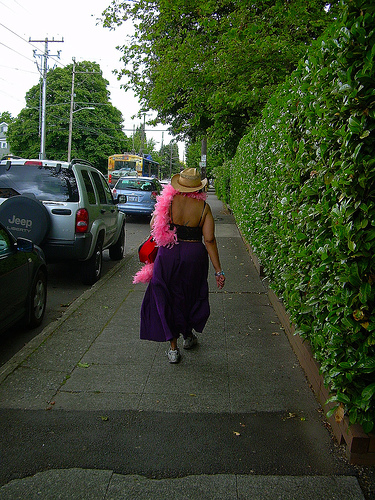

In [ ]:
print(train_captions[5])
Image.open(img_name_vector[5])

<start> Man and woman use telephot lens by a winter road . <end>


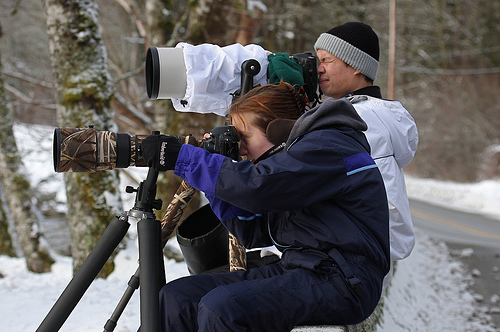

In [ ]:
print(train_captions[7176])
Image.open(img_name_vector[7176])

# Preprocess the images using Inception
 Using Pretrained Inception model trained on ImageNet dataset (available publicly on google) for image feature extraction.

In [ ]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.keras.layers.Resizing(299, 299)(img)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [ ]:
# Get unique images
encode_train = sorted(set(img_name_vector))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

In [ ]:
caption_dataset = tf.data.Dataset.from_tensor_slices(train_captions)

# We will override the default standardization of TextVectorization to preserve
# "<>" characters, so we preserve the tokens for the <start> and <end>.
def standardize(inputs):
  inputs = tf.strings.lower(inputs)
  return tf.strings.regex_replace(inputs,
                                  r"!\"#$%&\(\)\*\+.,-/:;=?@\[\\\]^_`{|}~", "")

# Max word count for a caption.
max_length = 50
# Use the top 5000 words for a vocabulary.
vocabulary_size = 5000
tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize=standardize,
    output_sequence_length=max_length)
# Learn the vocabulary from the caption data.
tokenizer.adapt(caption_dataset)

In [ ]:
# Create the tokenized vectors
cap_vector = caption_dataset.map(lambda x: tokenizer(x))

# Create mappings for words to indices and indices to words.
word_to_index = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())
index_to_word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

# Splitting the data

In [ ]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
  img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])


len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(14996, 14996, 3648, 3648)

# Creating TF data

In [ ]:
# Feel free to change these parameters according to your system's configuration

BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

In [ ]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int64]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    # score shape == (batch_size, 64, 1)
    # This gives you an unnormalized score for each image feature.
    score = self.V(attention_hidden_layer)

    # attention_weights shape == (batch_size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [ ]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units
    self.drop_prob=.5

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.drop= tf.keras.layers.Dropout(self.drop_prob)
    self.gru1 = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                    kernel_regularizer=tf.keras.regularizers.L2(0.01),
                                   recurrent_initializer='glorot_uniform')
    self.gru2 = tf.keras.layers.GRU(self.units,
                                    return_sequences=True,
                                   return_state=True,
                                    kernel_regularizer=tf.keras.regularizers.L2(0.01),
                                   recurrent_initializer='glorot_uniform')
    self.gru3 = tf.keras.layers.GRU(self.units,
                                    return_sequences=True,
                                   return_state=True,
                                    kernel_regularizer=tf.keras.regularizers.L2(0.01),
                                   recurrent_initializer='glorot_uniform')
    self.gru4 = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                    kernel_regularizer=tf.keras.regularizers.L2(0.01),
                                   recurrent_initializer='glorot_uniform')
    self.gru5 = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                    kernel_regularizer=tf.keras.regularizers.L2(0.01),
                                   recurrent_initializer='glorot_uniform')
    
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)
    x=self.drop(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output1, state1 = self.gru1(x)
    output2, state2 = self.gru2(output1, state1)
    output3, state3 = self.gru3(output2, state2)
    output4, state4 = self.gru4(output3, state3)
    output5, state5 = self.gru5(output4, state4)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output5)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state5, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [ ]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, tokenizer.vocabulary_size())

In [ ]:
#We choose Learning rate of .001 , make error surface more smooth, which can enhance generalization accuracy greatly.
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [ ]:
# adding this in a separate cell because if you run the training cell
# many times, the loss_plot array will be reset
loss_plot = []

@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([word_to_index('<start>')] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [ ]:
EPOCHS = 10

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss/num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')

Epoch 1 Batch 0 Loss 2.2596
Epoch 1 Batch 100 Loss 1.0567
Epoch 1 Batch 200 Loss 0.9946
Epoch 1 Loss 1.122538
Time taken for 1 epoch 1673.87 sec

Epoch 2 Batch 0 Loss 0.9697
Epoch 2 Batch 100 Loss 0.9152
Epoch 2 Batch 200 Loss 0.7941
Epoch 2 Loss 0.867991
Time taken for 1 epoch 96.11 sec

Epoch 3 Batch 0 Loss 0.8601
Epoch 3 Batch 100 Loss 0.7952
Epoch 3 Batch 200 Loss 0.8203
Epoch 3 Loss 0.790887
Time taken for 1 epoch 142.72 sec

Epoch 4 Batch 0 Loss 0.7979
Epoch 4 Batch 100 Loss 0.7373
Epoch 4 Batch 200 Loss 0.6894
Epoch 4 Loss 0.738380
Time taken for 1 epoch 154.99 sec

Epoch 5 Batch 0 Loss 0.7536
Epoch 5 Batch 100 Loss 0.7157
Epoch 5 Batch 200 Loss 0.7151
Epoch 5 Loss 0.692400
Time taken for 1 epoch 153.44 sec

Epoch 6 Batch 0 Loss 0.7208
Epoch 6 Batch 100 Loss 0.6751
Epoch 6 Batch 200 Loss 0.6369
Epoch 6 Loss 0.651902
Time taken for 1 epoch 150.92 sec

Epoch 7 Batch 0 Loss 0.7081
Epoch 7 Batch 100 Loss 0.6184
Epoch 7 Batch 200 Loss 0.6297
Epoch 7 Loss 0.617483
Time taken for 1 epo

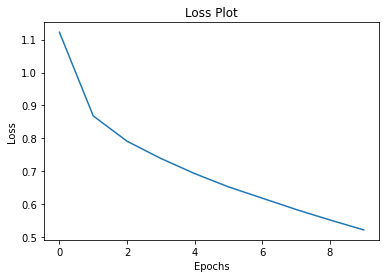

In [ ]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([word_to_index('<start>')], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(index_to_word(predicted_id).numpy())
        result.append(predicted_word)

        if predicted_word == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [ ]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (8, 8))
        grid_size = max(int(np.ceil(len_result/2)), 2)
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

Real Caption: <start> a rodeo rider do a vertical trick on a brown horse as an audience look on . <end>
Prediction Caption: several cowboy be throw into a fenced . <end>


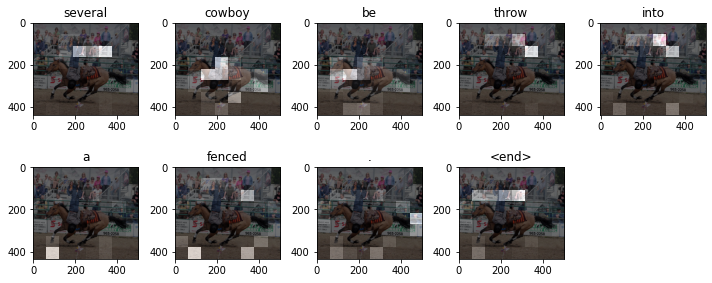

In [ ]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

73728/64400 [==================================] - 0s 1us/step
Prediction Caption: a man surf a huge wave . <end>


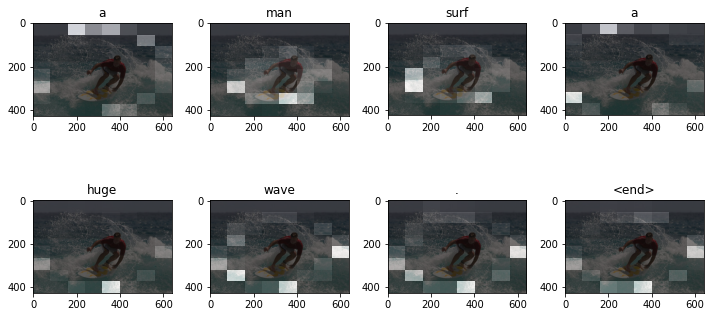

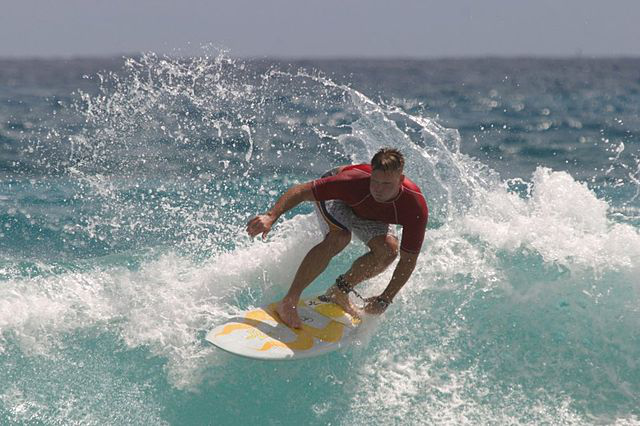

In [ ]:
image_url = 'https://tensorflow.org/images/surf.jpg'
image_extension = image_url[-4:]
image_path = tf.keras.utils.get_file('image'+image_extension, origin=image_url)

result, attention_plot = evaluate(image_path)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
# opening the image
Image.open(image_path)